<center><h1>DIT244 Project 3<br>(itp22104@hua.gr / Anastasios Kotronis)</h1><center>

# 1.1 Environment setup (Google Colab)

Install dependencies
- [`transformers` instructions](https://huggingface.co/docs/transformers/installation)
- [huggingface/datasets installation - github](https://github.com/huggingface/datasets/blob/2.13.0/README.md)

In [ ]:
!python -m pip install --upgrade pip
!pip install transformers[tf-cpu]
!pip install xformers
!pip install datasets

# 1.2 Environment setup (Local)

- Add `ipykernel==6.22.0` to `requirements.txt` so that we can change kernel in notebook file
- `>>> python -m venv venv` to create virtual environment with name venv
- `>>> .\venv\Scripts\activate.ps1` (Windows Powershell) to activate it
- `>>> python -m pip install --upgrade pip` to upgrade pip package manager
- `>>> python -m pip install -r requirements.txt`
- Add kernel to jupyter `>>> python -m ipykernel install --user --name=dit244-3` (`dit244-3` will appear in jupyter **Kernel** → **Change kernel** menu and can be a custom name, not necessarily the same as virtual environment name)

# 2. Χρήση pretrained μοντέλων

In [1]:
from transformers import pipeline

C:\ANASTASIS\DIT244-AI-and-IoT\Projects\Project-3\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2.1. Text Classification

Text Classification with [j-hartmann/emotion-english-distilroberta-base](https://huggingface.co/j-hartmann/emotion-english-distilroberta-base)

In [ ]:
text_1 = 'I love this!'
text_2 = 'I surely hate this plate and this makes me pitty about myself'
text_3 = 'I would not say I dislike this day, nor that I am enthusiastic about it'
text_4 = 'This extraordinarily disgusiting beauty is of my fond'

texts = [text_1, text_2, text_3, text_4]

In [ ]:
classifier = pipeline('text-classification', model='j-hartmann/emotion-english-distilroberta-base', top_k=None)

for i, text in enumerate(texts, 1):
    print(f' TEXT {i} '.center(100, '='))
    print(text)
    print()
    clf = sorted(classifier(text)[0], key=lambda x:x['label'])
    for label in clf:
        print(label)
    print()

============================================== TEXT 1 ==============================================
I love this!

{'label': 'anger', 'score': 0.004419787786900997}
{'label': 'disgust', 'score': 0.001611991785466671}
{'label': 'fear', 'score': 0.0004138524236623198}
{'label': 'joy', 'score': 0.9771687984466553}
{'label': 'neutral', 'score': 0.005764591973274946}
{'label': 'sadness', 'score': 0.002092393347993493}
{'label': 'surprise', 'score': 0.008528684265911579}

============================================== TEXT 2 ==============================================
I surely hate this plate and this makes me pitty about myself

{'label': 'anger', 'score': 0.10400301218032837}
{'label': 'disgust', 'score': 0.07186344265937805}
{'label': 'fear', 'score': 0.016615966334939003}
{'label': 'joy', 'score': 0.006794916931539774}
{'label': 'neutral', 'score': 0.023871345445513725}
{'label': 'sadness', 'score': 0.7655432820320129}
{'label': 'surprise', 'score': 0.011308115907013416}

============

It looks like this model catches specific words but not context (See example 3 which is a neutral phrase in context but neutral is low)

## 2.2. Zero-Shot Classification

Zero-Shot Classification with [facebook/bart-large-mnli](https://huggingface.co/facebook/bart-large-mnli)

In [ ]:
text_1 = 'I love this!'
text_2 = 'I surely hate this plate and this makes me pitty about myself'
text_3 = 'I would not say I dislike this day, nor that I am enthusiastic about it'
text_4 = 'This extraordinarily disgusiting beauty is of my fond'
text_5 = "Don't bullshit me I am not buying this"

texts = [text_1, text_2, text_3, text_4, text_5]

candidate_labels = ['affection', 'shopping', 'cooking', 'politics']

In [ ]:
classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli')

for i, text in enumerate(texts, 1):
    print(f' TEXT {i} '.center(100, '='))
    print(text)
    print()
    clf = classifier(text, candidate_labels, multi_label=True)
    clf = [{'label':item[0], 'score':item[1]} for item in zip(clf['labels'], clf['scores'])]
    clf = sorted(clf, key=lambda x:x['label'])
    for label in clf:
        print(label)
    print()

============================================== TEXT 1 ==============================================
I love this!

{'label': 'affection', 'score': 0.9635745286941528}
{'label': 'cooking', 'score': 0.6533708572387695}
{'label': 'politics', 'score': 0.07594060897827148}
{'label': 'shopping', 'score': 0.2407349944114685}

============================================== TEXT 2 ==============================================
I surely hate this plate and this makes me pitty about myself

{'label': 'affection', 'score': 0.0004045303212478757}
{'label': 'cooking', 'score': 0.8133435249328613}
{'label': 'politics', 'score': 0.06993021070957184}
{'label': 'shopping', 'score': 0.0019582295790314674}

============================================== TEXT 3 ==============================================
I would not say I dislike this day, nor that I am enthusiastic about it

{'label': 'affection', 'score': 0.22424258291721344}
{'label': 'cooking', 'score': 0.12882106006145477}
{'label': 'politics', 'sc

Same as above. It doesn't seem to catch context. See last case 'shopping'

## 2.3. Token ClassificationZero-Shot Classification

For **Colab**

Required for error:
```
Couldn't instantiate the backend tokenizer from one of:
(1) a `tokenizers` library serialization file,
(2) a slow tokenizer instance to convert or
(3) an equivalent slow tokenizer class to instantiate and convert.
You need to have sentencepiece installed to convert a slow tokenizer to a fast one.
```

Restart kernel after installing

In [ ]:
!pip install sentencepiece

Token Classification with [Jean-Baptiste/camembert-ner](https://huggingface.co/Jean-Baptiste/camembert-ner)

In [ ]:
text_1 = "Apple est créée le 1er avril 1976 dans le garage de la maison d'enfance de Steve Jobs à Los Altos en Californie par Steve Jobs, Steve Wozniak et Ronald Wayne14, puis constituée sous forme de société le 3 janvier 1977 à l'origine sous le nom d'Apple Computer, mais pour ses 30 ans et pour refléter la diversification de ses produits, le mot « computer » est retiré le 9 janvier 2015."
text_2 = "Human resources are like natural resources; they're often buried deep. You have to go looking for them; they're not just lying around on the surface. Ken Robinson"
text_3 = "Python was conceived in the late 1980s[43] by Guido van Rossum at Centrum Wiskunde & Informatica (CWI) in the Netherlands as a successor to the ABC programming language, which was inspired by SETL, capable of exception handling and interfacing with the Amoeba operating system"
text_4 = "Ο Μικελάντζελο ντι Λοντοβίκο Μπουοναρότι Σιμόνι (Michelangelo di Lodovico Buonarroti Simoni, 6 Μαρτίου 1475 – 18 Φεβρουαρίου 1564), γνωστός περισσότερο ως Μιχαήλ Άγγελος, ήταν Ιταλός γλύπτης, ζωγράφος, αρχιτέκτονας και ποιητής της Αναγέννησης, που άσκησε απαράμιλλη επίδραση στην ανάπτυξη της δυτικής τέχνης"
text_5 = "Michelangelo di Lodovico Buonarroti Simoni, known as Michelangelo, was an Italian sculptor, painter, architect and poet of the High Renaissance. Born in the Republic of Florence, his work was inspired by models from classical antiquity and had a lasting influence on Western art"

texts = [text_1, text_2, text_3, text_4, text_5]

In [ ]:
import textwrap
from transformers import AutoTokenizer, AutoModelForTokenClassification

PRETRAINED_MODEL = 'Jean-Baptiste/camembert-ner'
tokenizer = AutoTokenizer.from_pretrained(PRETRAINED_MODEL)
token_classifier = AutoModelForTokenClassification.from_pretrained(PRETRAINED_MODEL)

In [ ]:
wrapper = textwrap.TextWrapper(width=120)

classifier = pipeline(
    'ner',
    model=token_classifier,
    tokenizer=tokenizer,
    aggregation_strategy='simple'
)

for i, text in enumerate(texts, 1):
    print(f' TEXT {i} '.center(100, '='))
    print(wrapper.fill(text))
    print()
    clf = classifier(text)
    for item in clf:
        print(item)
    print()

============================================== TEXT 1 ==============================================
Apple est créée le 1er avril 1976 dans le garage de la maison d'enfance de Steve Jobs à Los Altos en Californie par
Steve Jobs, Steve Wozniak et Ronald Wayne14, puis constituée sous forme de société le 3 janvier 1977 à l'origine sous le
nom d'Apple Computer, mais pour ses 30 ans et pour refléter la diversification de ses produits, le mot « computer » est
retiré le 9 janvier 2015.

{'entity_group': 'ORG', 'score': 0.9921588, 'word': 'Apple', 'start': 0, 'end': 5}
{'entity_group': 'PER', 'score': 0.99597645, 'word': 'Steve Jobs', 'start': 74, 'end': 85}
{'entity_group': 'LOC', 'score': 0.99835855, 'word': 'Los Altos', 'start': 87, 'end': 97}
{'entity_group': 'LOC', 'score': 0.9982911, 'word': 'Californie', 'start': 100, 'end': 111}
{'entity_group': 'PER', 'score': 0.99870753, 'word': 'Steve Jobs', 'start': 115, 'end': 126}
{'entity_group': 'PER', 'score': 0.99879086, 'word': 'Steve Woznia

Although this model has been trained in french text, it looks like it goes well in the english language as well.

In greek text it doesn't perform well as with the same sentence in english.

I would trust it for french and english text.

## 2.4. Question Answering

Token Classification with [roberta-base-squad2](https://huggingface.co/deepset/roberta-base-squad2)

In [53]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

PRETRAINED_MODEL = "deepset/roberta-base-squad2"

nlp = pipeline('question-answering', model=PRETRAINED_MODEL, tokenizer=PRETRAINED_MODEL)

{'score': 0.2117147594690323,
 'start': 59,
 'end': 84,
 'answer': 'gives freedom to the user'}

In [55]:
text_1 = {
    'question': 'Why is model conversion important?',
    'context': 'The option to convert models between FARM and transformers gives freedom to the user and let people easily switch between frameworks.'
}
text_2 = {
    'question': 'Is it true that although I am bold, I am good looking as they say?',
    'context': 'According to a recent survey conducted on a random sample of 40.000.000 women, men with no hair are considered attractive',
}

texts = [text_1, text_2]

In [57]:
for i, text in enumerate(texts, 1):
    print(f' TEXT {i} '.center(100, '='))
    print(nlp(text))
    print()

============================================== TEXT 1 ==============================================
{'score': 0.2117147594690323, 'start': 59, 'end': 84, 'answer': 'gives freedom to the user'}

============================================== TEXT 2 ==============================================
{'score': 0.043438591063022614, 'start': 79, 'end': 121, 'answer': 'men with no hair are considered attractive'}



The model doesn't seem to be very sure about it's predictions (low score), however in case 2 it hit bool's eye, and I would trust it.

## 2.5. Summarization

Summarization with [facebook/bart-large-cnn](https://huggingface.co/facebook/bart-large-cnn)

In [58]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

In [59]:
text_1 = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""

text_2 = """Stephen William Hawking (8 January 1942 – 14 March 2018) was an English theoretical physicist, cosmologist, and author who, at the time of his death, was director of research at the Centre for Theoretical Cosmology at the University of Cambridge.[6][17][18] Between 1979 and 2009, he was the Lucasian Professor of Mathematics at the University of Cambridge, widely viewed as one of the most prestigious academic posts in the world.[19]
Hawking was born in Oxford into a family of physicians. In October 1959, at the age of 17, he began his university education at University College, Oxford, where he received a first-class BA degree in physics. In October 1962, he began his graduate work at Trinity Hall at the University of Cambridge where, in March 1966, he obtained his PhD degree in applied mathematics and theoretical physics, specialising in general relativity and cosmology. In 1963, at age 21, Hawking was diagnosed with an early-onset slow-progressing form of motor neurone disease that gradually, over decades, paralysed him.[20][21] After the loss of his speech, he communicated through a speech-generating device initially through use of a handheld switch, and eventually by using a single cheek muscle.[22]
Hawking's scientific works included a collaboration with Roger Penrose on gravitational singularity theorems in the framework of general relativity, and the theoretical prediction that black holes emit radiation, often called Hawking radiation. Initially, Hawking radiation was controversial. By the late 1970s and following the publication of further research, the discovery was widely accepted as a major breakthrough in theoretical physics. Hawking was the first to set out a theory of cosmology explained by a union of the general theory of relativity and quantum mechanics. He was a vigorous supporter of the many-worlds interpretation of quantum mechanics.[23][24]
Hawking achieved commercial success with several works of popular science in which he discussed his theories and cosmology in general. His book A Brief History of Time appeared on the Sunday Times bestseller list for a record-breaking 237 weeks. Hawking was a Fellow of the Royal Society, a lifetime member of the Pontifical Academy of Sciences, and a recipient of the Presidential Medal of Freedom, the highest civilian award in the United States. In 2002, Hawking was ranked number 25 in the BBC's poll of the 100 Greatest Britons. He died in 2018 at the age of 76, after living with motor neurone disease for more than 50 years"""

texts = [text_1, text_2]

In [61]:
for i, text in enumerate(texts, 1):
    print(f' TEXT {i} '.center(100, '='))
    print(text)
    print()
    print(summarizer(text, max_length=130, min_length=30, do_sample=False))

============================================== TEXT 1 ==============================================
 New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York. A year later,
she got married again in Westchester County, but to a different man and without divorcing her first husband. Only 18
days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only
within two weeks of each other. In 2010, she married once more, this time in the Bronx. In an application for a marriage
license, she stated it was her "first and only" marriage. Barrientos, now 39, is facing two criminal counts of "offering
a false instrument for filing in the first degree," referring to her false statements on the 2010 marriage license
application, according to court documents. Prosecutors said the marriages were part of an immigration scam. On Friday,
she pleaded not guilty at State Supreme Court in the Bronx, according 

This one looks good, although it doesn't rephrases context. It rather seems to select phrases.

## 2.6. Translation

Translation with [optimum/t5-small](https://huggingface.co/optimum/t5-small)

In [ ]:
from transformers import AutoTokenizer, pipeline
from optimum.onnxruntime import ORTModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("optimum/t5-small")
model = ORTModelForSeq2SeqLM.from_pretrained("optimum/t5-small")

translator = pipeline("translation_en_to_fr", model=model, tokenizer=tokenizer)

In [ ]:
text_1 = 'My name is Eustache and I have a pet raccoon'
text_2 = 'Tommorow I will go to work'
text_3 = "Yesterday it was my brother in law's birthday, but i didn't call"

texts = [text_1, texte_2, texte_3]

In [ ]:
for i, text in enumerate(texts, 1):
    print(f' TEXT {i} '.center(100, '='))
    print(text)
    print()
    print(translator(text))

## 2.7. Language modeling

# 3. Finetuning ενός προεκπαιδευμένου μοντέλου

## 3.1. Επιλογή ενός Dataset

- [huggingface/datasets - github](https://github.com/huggingface/datasets/blob/2.13.0/README.md)
- [huggingface/datasets - huggingface docs](https://huggingface.co/docs/datasets/v2.13.0/en/package_reference/loading_methods#datasets.load_dataset_builder)

In [2]:
from datasets import list_datasets, load_dataset, load_dataset_builder

In [3]:
# DATASET = 'imdb'
# DATASET = 'rotten_tomatoes'
DATASET = ('glue', 'cola')

Define `builder`

In [4]:
ds_builder = load_dataset_builder(DATASET) if isinstance(DATASET, str) else load_dataset_builder(*DATASET)

Inspect dataset with `builder` attributes

In [5]:
import textwrap

wrapper = textwrap.TextWrapper(width=120)

print(' DESCRIPTION '.center(50, '='))
print(wrapper.fill(ds_builder.info.description))
print()
print(' FEATURES '.center(50, '='))
print(ds_builder.info.features)

================== DESCRIPTION ===================
GLUE, the General Language Understanding Evaluation benchmark (https://gluebenchmark.com/) is a collection of resources
for training, evaluating, and analyzing natural language understanding systems.

==================== FEATURES ====================
{'sentence': Value(dtype='string', id=None), 'label': ClassLabel(names=['unacceptable', 'acceptable'], id=None), 'idx': Value(dtype='int32', id=None)}


Downoad the data

In [69]:
data = load_dataset(DATASET) if isinstance(DATASET, str) else load_dataset(*DATASET)

Found cached dataset glue (C:/Users/akotr/.cache/huggingface/datasets/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)
100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 74.95it/s]


In [70]:
data

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 8551
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1043
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1063
    })
})

[Split furthermore](https://discuss.huggingface.co/t/how-to-split-hugging-face-dataset-to-train-and-test/20885/4), the initial test data into ***test*** and ***validation*** if it is not already split

In [71]:
### I test/validation sets are together, then split
if 'test' in data and 'validation' not in data:
    train = data['train']
    test_val = data['test']
    test_val = test_val.train_test_split(test_size=0.5)
    test, val = test_val['train'], test_val['test']
else:
    train, test, val = data['train'], data['test'], data['validation']

print(' TRAIN '.center(50, '='))
print(train)
print(' TEST '.center(50, '='))
print(test)
print(' VALIDATION '.center(50, '='))
print(val)

===================== TRAIN ======================
Dataset({
    features: ['sentence', 'label', 'idx'],
    num_rows: 8551
})
====================== TEST ======================
Dataset({
    features: ['sentence', 'label', 'idx'],
    num_rows: 1063
})
=================== VALIDATION ===================
Dataset({
    features: ['sentence', 'label', 'idx'],
    num_rows: 1043
})


Inspect first row of **train** data

In [8]:
next(iter(train))

{'sentence': "Our friends won't buy this analysis, let alone the next one we propose.",
 'label': 1,
 'idx': 0}

## 3.2. Preprocessing και Finetuning

Define `tokenizer` ([`bert-base-cased`](https://huggingface.co/bert-base-cased))

In [19]:
from transformers import AutoTokenizer

tknzr = AutoTokenizer.from_pretrained('bert-base-cased')

Define a function to tokenize datasets

- [According to the docs](https://huggingface.co/docs/transformers/pad_truncation#padding-and-truncation), *In most cases, padding your batch to the length of the longest sequence and truncating to the maximum length a model can accept works pretty well*, so we use `padding=True` and `truncate=True`
- Tokenizer returns a `BatchEncoding`, so we convert that to a dict for compatibility with `Keras`

See also
- [Huggingface: Process Text Data](https://huggingface.co/docs/datasets/nlp_process)
- [Train a Tensorflow model with `Keras`](https://huggingface.co/docs/transformers/training#train-a-tensorflow-model-with-keras)

In [72]:
import numpy as np

text_label = 'text' if 'text' in train.features else 'sentence'

f = lambda ds: (
    dict(
        tknzr(
            ds[text_label],
            return_tensors="np",
            padding=True,
            truncation=True
        )
    ),
    np.array(ds["label"])
)

Tokenize datasets

In [25]:
train_tok_data, train_lbls = f(train)
test_tok_data, test_lbls = f(test)
val_tok_data, val_lbls = f(val)

Inspect tokenized content/label of first instance of train dataset

Labels

In [12]:
print(train_lbls[0])

1


In [13]:
train_tok_data.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

[Input ids](https://huggingface.co/docs/transformers/glossary#input-ids): The text tokens converted to ids in order to be understandable by the model

In [14]:
print(train_tok_data['input_ids'][0][:20])

[  101  3458  2053  1281   112   189  4417  1142  3622   117  1519  2041
  1103  1397  1141  1195 17794   119   102     0]


[Token type ids](https://huggingface.co/docs/transformers/glossary#token-type-ids): Token type IDs are represented as a binary mask identifying two types of sequence in the model. First sequence, the “context” is used for the question (all its tokens represented by a 0) and the second sequence, corresponds to the “question” (all its tokens represented by a 1). These two sequences are joined in a single “input_ids” entry and serve some models purpose to do classification on pairs of sentences or question answering.

In [15]:
print(train_tok_data['token_type_ids'][0][:20])
print(f"Unique: {set(train_tok_data['token_type_ids'][0])}")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Unique: {0}


[Attention mask](https://huggingface.co/docs/transformers/glossary#attention-mask): A binary tensor indicating the position of the padded indices so that the model does not attend to them

In [16]:
print(train_tok_data['attention_mask'][0][:20])
print(f"Unique: {set(train_tok_data['attention_mask'][0][:20])}")

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Unique: {0, 1}


Define and load the model

In [17]:
from transformers import TFAutoModelForSequenceClassification

mymodel = TFAutoModelForSequenceClassification.from_pretrained('bert-base-cased')
# mymodel_1 = TFAutoModelForSequenceClassification.from_pretrained('bert-base-cased')

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## 3.3. Finetuning

Compile and fit the model

In [78]:
# EPOCHS = 2
EPOCHS = 10

# PATIENCE = 2
PATIENCE = 5

BATCH_SIZE = 32

# LEARNING_RATE = 0.01
LEARNING_RATE = 0.001
# LEARNING_RATE = 3e-5

In [19]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Compile
mymodel.compile(
    loss='binary_crossentropy',
    optimizer=Adam(
            learning_rate=LEARNING_RATE,
            beta_1=0.9,
            beta_2=0.99
        ),
        metrics=['accuracy']
)

# Fit
history = mymodel.fit(
    train_tok_data,
    train_lbls,
    validation_data=[val_tok_data, val_lbls],
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[
        EarlyStopping(
            monitor='val_loss',
            mode='min',
            patience=PATIENCE
        )
    ]
)



Epoch 1/10
268/268 [==============================] - 2507s 9s/step - loss: 10.5815 - accuracy: 0.5040 - val_loss: 10.6629 - val_accuracy: 0.6913
Epoch 2/10
268/268 [==============================] - 2457s 9s/step - loss: 10.8647 - accuracy: 0.5002 - val_loss: 10.6629 - val_accuracy: 0.6913
Epoch 3/10
268/268 [==============================] - 2464s 9s/step - loss: 10.8647 - accuracy: 0.4930 - val_loss: 10.6629 - val_accuracy: 0.6913
Epoch 4/10
268/268 [==============================] - 2490s 9s/step - loss: 10.8629 - accuracy: 0.4899 - val_loss: 10.6629 - val_accuracy: 0.6913
Epoch 5/10
268/268 [==============================] - 2493s 9s/step - loss: 10.8629 - accuracy: 0.4847 - val_loss: 10.6629 - val_accuracy: 0.6913
Epoch 6/10
268/268 [==============================] - 2486s 9s/step - loss: 10.8647 - accuracy: 0.4984 - val_loss: 10.6629 - val_accuracy: 0.6913


In [79]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Compile
mymodel_1.compile(
    loss='binary_crossentropy',
    optimizer=Adam(
            learning_rate=LEARNING_RATE,
            beta_1=0.9,
            beta_2=0.99
        ),
        metrics=['accuracy']
)

# Fit
history = mymodel_1.fit(
    train_tok_data,
    train_lbls,
    validation_data=[val_tok_data, val_lbls],
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
#     callbacks=[
#         EarlyStopping(
#             monitor='val_loss',
#             mode='min',
#             patience=PATIENCE
#         )
#     ]
)



Epoch 1/2
268/268 [==============================] - 2580s 10s/step - loss: 7.6921 - accuracy: 0.2956 - val_loss: 7.6854 - val_accuracy: 0.3087
Epoch 2/2
268/268 [==============================] - 2505s 9s/step - loss: 7.6865 - accuracy: 0.2956 - val_loss: 7.6854 - val_accuracy: 0.3087


Save and load the model if needed

In [94]:
from tensorflow.keras.models import save_model

save_model(mymodel, 'model')
# save_model(mymodel_1, 'model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


In [16]:
from tensorflow.keras.models import load_model
mymodel = load_model('model')

## 3.4. Αξιολόγηση

In [6]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
import seaborn as sns

sns.set_theme()
%matplotlib inline

### 3.4.0 Βοηθητικές συναρτήσεις

For the model evaluation we define the following functions:
- `y_y_pred_from_ds` to get labels and predictions from dataset with a model
- `clf_report` to convert make the classification report string
- `clf_report_do_df` to convert the classification report string to a `DataFrame` for display purposes
- `confusion_matrix_report` to plot the confusion matrix and return it
- `stats_from_confusion_matrix` to calculate stats from the confusion matrix independently of the classification report

In [26]:
CLASS_NAMES = ds_builder.info.features.get('label').names
NUM_CLASSES = len(CLASS_NAMES)
DATASETS_DICT = {'train':[train_tok_data, val_lbls], 'test':[test_tok_data, test_lbls], 'val':[val_tok_data, val_lbls]}

print(CLASS_NAMES)

['unacceptable', 'acceptable']


In [27]:
def clf_report(model, subset, digits=5):
    '''Makes Classification Report and returns it'''

    ds = DATASETS_DICT[subset] if isinstance(subset, str) else subset
    y, y_pred = y_y_pred_from_ds(ds, model)

    # Classification report
    return metrics.classification_report(
        y,
        y_pred,
        target_names=CLASS_NAMES,
        digits=digits
    )

In [28]:
def clf_report_to_df(txt):
    '''Convert classification report to DataFrame'''

    txt = txt.strip().replace('\n\n', '\n')
    txt = [ln.strip() for ln in txt.split('\n')]
    lines = []
    for ln in txt:
        if ln.startswith('accuracy'):
            line = ln.split()
            line.insert(1,'')
            line.insert(1,'')
        elif ln.startswith('precision'):
            line = ln.split()
            line.insert(0,'classes/agg')
        elif 'avg' in ln:
            line = ln.replace(' avg','-avg').split()
        else:
            line = ln.split()
        lines.append(line)

    return pd.DataFrame(data=lines[1:], columns=lines[0]).set_index('classes/agg')

In [29]:
def stats_from_confusion_matrix(cm):
    '''Calculate stats from Confusion Matrix'''

    import warnings
    warnings.filterwarnings('ignore')

    # Convert Confusion Matrix to DataFrame
    df = pd.DataFrame(cm, columns=CLASS_NAMES, index=CLASS_NAMES)
    df.columns.name = 'Predicted'
    df.index.name = 'Actual'

    # Accuracy
    acc = df.mul(np.eye(len(df))).sum().sum() / df.sum().sum()
    precisions, recalls, fscores = [], [], []
    print(f' Per Class '.center(50, '='))
    for cls in CLASS_NAMES:
        print(f'Class `{cls}`')
        tp = df.loc[cls,cls]            # Class TP
        fp = df.loc[:,cls].sum() - tp   # Class FP
        fn = df.loc[cls,:].sum() - tp   # Class FN
        # Class Precision
        try:
            pr = tp / (tp + fp)
        except:
            pr = 0
        else:
            if pd.isnull(pr):
                pr = 0
        # Class Recall
        try:
            rc = tp / (tp + fn)
        except:
            rc = 0
        else:
            if pd.isnull(rc):
                rc = 0
        # Class FScore
        try:
            1 / pr
            1 / rc
        except:
            fsc = 0
        else:
            fsc = 2 * pr * rc / (pr + rc)
            if pd.isnull(fsc):
                fsc = 0
        precisions.append(pr)
        recalls.append(rc)
        fscores.append(fsc)
        print(f'\tPrecision: {pr:.5f}')
        print(f'\tRecall: {rc:.5f}')
        print(f'\tFScore: {fsc:.5f}')
    print(f' Overall '.center(50, '='))
    print(f'Accuracy: {acc:.5f}')
    print(f'Precision: {sum(precisions)/len(precisions):.5f}')
    print(f'Recall: {sum(recalls)/len(recalls):.5f}')
    print(f'FScore: {sum(fscores)/len(fscores):.5f}')

In [30]:
def confusion_matrix_report(model, subset):
    '''plot Confusion Matrix and return it'''

    ds = DATASETS_DICT[subset] if isinstance(subset, str) else subset
    y, y_pred = y_y_pred_from_ds(ds, model)

    # Confusion Matrix
    fig, ax = plt.subplots(figsize=(6,4))
    ax.grid(False)
    cm = metrics.confusion_matrix(y, y_pred)
    cmp = metrics.ConfusionMatrixDisplay(cm, display_labels=CLASS_NAMES)
    cmp.plot(ax=ax, xticks_rotation=45)
    plt.show()
    return cm

In [38]:
def y_y_pred_from_ds(ds, model):
    '''Get labels and predictions from dataset using model
       ds can be a dataset or a list of the form [X, y]
    '''
    if not isinstance(ds, list):
        y_pred, y = [], []
        for feature, label in ds:
            y_pred.extend(model.predict(feature))
            y.extend(label.numpy())
    else:
        X, y = ds
        y_pred = model.predict(X)
        
    # Transform labels to class names
    y = [CLASS_NAMES[x] for x in y]
    logits = np.argmax(y_pred.logits if not isinstance(y_pred, dict) else y_pred.get('logits'), axis=1) 
    y_pred = [CLASS_NAMES[x] for x in logits]
    return y, y_pred

### 3.2.1. ***Validation*** dataset

33/33 [==============================] - 67s 2s/step


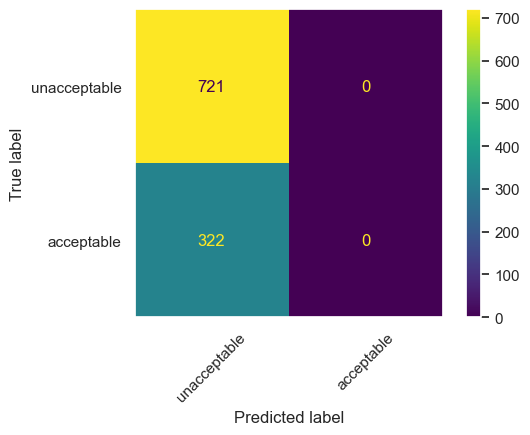

=================== Per Class ====================
Class `unacceptable`
	Precision: 0.69128
	Recall: 1.00000
	FScore: 0.81746
Class `acceptable`
	Precision: 0.00000
	Recall: 0.00000
	FScore: 0.00000
==================== Overall =====================
Accuracy: 0.69128
Precision: 0.34564
Recall: 0.50000
FScore: 0.40873


In [40]:
stats_from_confusion_matrix(confusion_matrix_report(mymodel, 'val'))

We can also calculate stats directly from `sklearn.metrics.classification_report`

In [42]:
clf_report_to_df(clf_report(mymodel, 'val'))

33/33 [==============================] - 66s 2s/step


,precision,recall,f1-score,support
classes/agg,,,,
unacceptable,0.69128,1.00000,0.81746,721
acceptable,0.00000,0.00000,0.00000,322
accuracy,,,0.69128,1043
macro-avg,0.34564,0.50000,0.40873,1043
weighted-avg,0.47786,0.69128,0.56509,1043


Unfortunatelly with all combinations I tried concerning
- the data input `truncation`, `padding`,
- the finetuning paramaters *learning rate*, *epochs*, *batch_size*, *callbacks* | *patience*,

the model gives the same predictions, either the posistive or the negative and I couldn't resolve this issue

Conversations about this situation
- [SO](https://stackoverflow.com/questions/64675655/bert-always-predicts-same-class-fine-tuning)
- [Github](https://github.com/ThilinaRajapakse/simpletransformers/issues/234)

# References

- [`transformers` instructions](https://huggingface.co/docs/transformers/installation)
- [huggingface/datasets installation - github](https://github.com/huggingface/datasets/blob/2.13.0/README.md)
- [Huggingface Tasks](https://huggingface.co/tasks)
- [`bert-base-cased`](https://huggingface.co/bert-base-cased)
- [Huggingface: Process Text Data](https://huggingface.co/docs/datasets/nlp_process)
- [Huggingface Glossary](https://huggingface.co/docs/transformers/glossary)
- [`TFAutoModelForSequenceClassification`](https://huggingface.co/transformers/v3.0.2/model_doc/auto.html#tfautomodelforsequenceclassification)
- [Fine tune a pretrained model](https://huggingface.co/docs/transformers/training#finetune-a-pretrained-model)
- [Transformer Notebooks](https://huggingface.co/docs/transformers/notebooks)
- [Text Classification with `Tensorflow`](https://github.com/huggingface/notebooks/blob/main/examples/text_classification-tf.ipynb)